[1] 1.910156e-21

The lowest p-value was observed at sample size 2011 
The p-value dropped below 0.05 for the first time as sample size 62

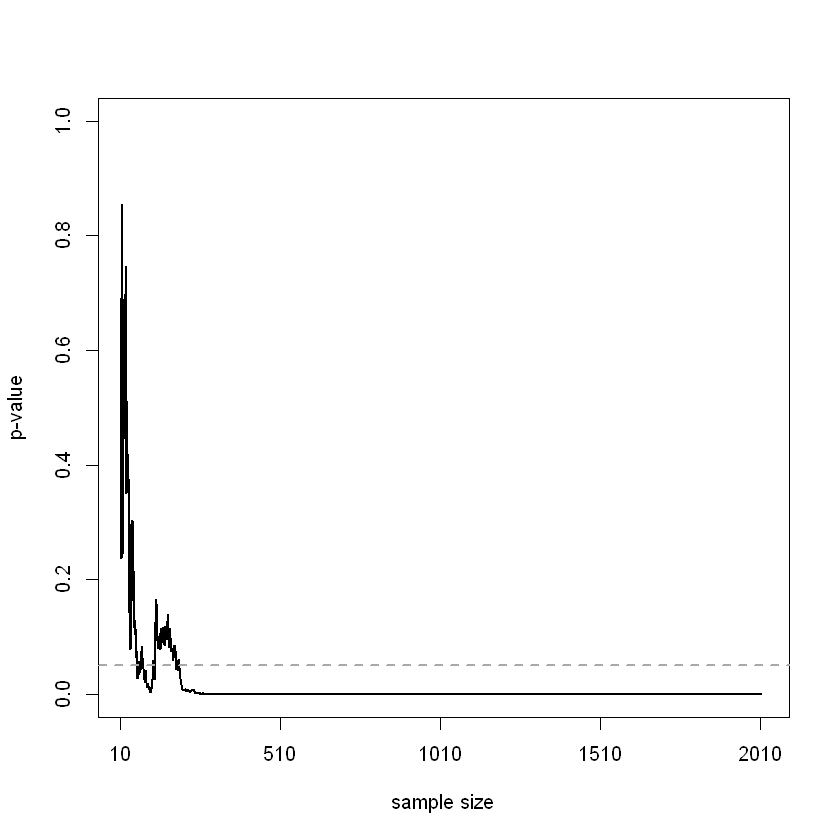

In [71]:
n <- 2000  # total number of datapoints (per condition) you are willing to collect after initial 10

D <- 0.3  # True effect size (Keep SD below to 1, otherwise, this is just mean diff, not d)
SD <- 1  # Set True standard deviation.

p <- numeric(n)  # store p-values
x <- numeric(n)  # store x-values
y <- numeric(n)  # store y-values

n <- n + 10  # script calculates p-values after 10 people in each condition, so add 10 to number of datapoints

for (i in 10:n) {  # for each simulated participants after the first 10
    x[i] <- rnorm(n=1, mean=0, sd=SD)
    y[i] <- rnorm(n=1, mean=D, sd=SD)
    z <- t.test(x[1:i], y[1:i], var.equal=TRUE)  # perform the t-test
    p[i] <- z$p.value
}

p <- p[10:n]  # Remove first 10 empty p-values

# Create the plot
plot(0, col="red", lty=1, lwd=3, ylim=c(0,1), xlim=c(10,n),
     type="l", xlab='sample size', ylab='p-value',
     cex.lab=1, cex.axis=1, xaxt="n")
lines(p, lwd=2)
abline(h=0.05, col="darkgrey", lty=2, lwd=2)  # draw ine at p = 0.05
axis(1, at=seq(0, n-10, by=(n - 10)/4), labels=seq(10, n, by=(n - 10)/4))

min(p)  # Return lowest p-value from all looks
# Return the sample size at which the p-value was smallest
cat("The lowest p-value was observed at sample size", which.min(p) + 10, "\n")
# Return the sample size at which the p-value dropped below 0.05 for the first
cat("The p-value dropped below 0.05 for the first time as sample size", which(p < 0.05)[1] + 10)

In [ ]:
N <- 100  # total number of datapoints (per condition) you are willing to collect
Looks <- 5  # set number of looks at the data
nSim <- 5000  # number of simulated studies
alpha <- 0.05  # set alpha

D <- 0  # True effect size (must be 0 when simulating Type 1 errors)

# Take care of some settings
options(scipen=100, digits=4)  # disable scientific notation for numbers
LookN <- ceiling(seq(0, N, N/Looks))  # Determine at which N's to look
LookN <- LookN[-1]  # remove look at 0
LookN <- LookN[LookN > 2]  # Remove looks at N of 1 or 2 (not possible with t-test)
Looks <- length(LookN)  # if looks are removed, change number of looks
matp <- matrix(NA, nrow=nSim, ncol=Looks)  # Matrix for p-values at sequential tests
SigSeq <- numeric(Looks)  # Variable to store final p-values
OptStop <- numeric(nSim)  # variable to store positions of optional stopping
p <- numeric(nSim)  # Variable to save optional stopping p-values

# Loop data generation for each study, then loop to perform a test for each N 
for (i in 1:nSim) {
  x <- rnorm(n=N, mean=0, sd=1)
  y <- rnorm(n=N, mean=D, sd=1)
  for (j in 1:Looks) {
      matp[i, j] <- t.test(x[1:LookN[j]], y[1:LookN[j]], var.equal=TRUE)$p.value  # perform the t-test, store
  }
  # cat('Loop', i, 'of', nSim,'\n')
}

# Save Type 1 error rate for each look
for (i in 1:Looks) {
  SigSeq[i] <- sum(matp[,i] < alpha)
}

# Get the positions at which are stopped, and then these p-values
for (i in 1:nSim) {
  OptStop[i] <- min(which(matp[i,] < alpha))
}
OptStop[is.infinite(OptStop)] <- Looks  # If nothing significant, take last p-value (fixes error warning)
for (i in 1:nSim) {
  p[i] <- matp[i, OptStop[i]]
}

breaks <- 100
hist(p, breaks=breaks, col="grey")
abline(h=nSim/breaks, col="red", lty=3)

# Return Type 1 error rates for each look, and the the Type 1 error rate when only reporting the lowest p-value over all looks
cat("Type 1 error rates for look 1 to", Looks, ":", SigSeq/nSim)
cat("Type 1 error rate when only the lowest p-value for all looks is reported:", sum(p < alpha)/nSim)

Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in min(which(matp[i, ] < alpha)):
"no non-missing arguments to min; returning Inf"Warning message in m